In [172]:
from PIL import Image
import numpy as np

obrazy w trybie L

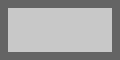

In [173]:
def rysuj_ramke_szare(w, h, grub, kolor_ramki, kolor):  #kolor od 0 do 255
    t = (h, w)
    tab = np.ones(t, dtype=np.uint8)
    tab[:] = kolor_ramki  # wypełnienie tablicy szarym kolorem o wartości kolor_ramki
    tab[grub:h - grub, grub:w - grub] = kolor  # wypełnienie podtablicy kolorem o wartości kolor
    return Image.fromarray(tab)


im_ramka = rysuj_ramke_szare(120, 60, 8, 100, 200)
im_ramka

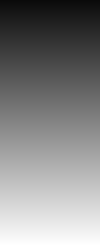

In [174]:
def rysuj_pasy_poziome_szare(w, h, grub, zmiana_koloru):
    t = (h, w)
    tab = np.ones(t, dtype=np.uint8)
    ile = int(h / grub)
    for k in range(ile):
        for g in range(grub):
            i = k * grub + g
            for j in range(w):
                tab[i, j] = (k + zmiana_koloru) % 256
    return Image.fromarray(tab)


im_paski = rysuj_pasy_poziome_szare(100, 246, 1, 10)
im_paski

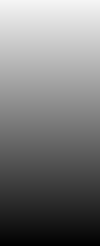

In [175]:
def negatyw_szare(obraz):
    tab = np.asarray(obraz)
    h, w = tab.shape
    tab_neg = tab.copy()
    for i in range(h):
        for j in range(w):
            tab_neg[i, j] = 255 - tab[i, j]
    return Image.fromarray(tab_neg)


obraz_neg = negatyw_szare(im_paski)
obraz_neg

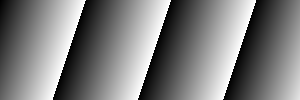

In [176]:
def rysuj_po_skosie_szare(h, w, a, b):  # formuła zmiany wartości elemntów tablicy a*i + b*j
    t = (h, w)  # rysuje kwadratowy obraz
    tab = np.zeros(t, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            tab[i, j] = (a * i + b * j) % 256
    return Image.fromarray(tab)


im_skos = rysuj_po_skosie_szare(100, 300, 1, 3)
im_skos

obrazy w trybie RGB

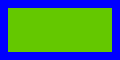

In [177]:
def rysuj_ramke_kolor(w, h, grub, kolor_ramki, kolor_tla):  # kolor_ramki, kolor podajemy w postaci [r, g, b]
    t = (h, w, 3)  # rozmiar tablicy
    tab = np.ones(t, dtype=np.uint8)  # deklaracja tablicy
    tab[:] = kolor_ramki  # wypełnienie tablicy kolorem kolor_ramki
    tab[grub:h - grub, grub:w - grub, 0] = kolor_tla[0]  #  wartości kanału R 
    tab[grub:h - grub, grub:w - grub, 1] = kolor_tla[1]  #  wartości kanału G 
    tab[grub:h - grub, grub:w - grub, 2] = kolor_tla[2]  #  wartości kanału B 
    # tab[grub:h - grub, grub:w - grub] = kolor_tla # wersja równoważna
    return Image.fromarray(tab)


im_ramka_kolor = rysuj_ramke_kolor(120, 60, 8, [0, 0, 255], [100, 200, 0])
im_ramka_kolor


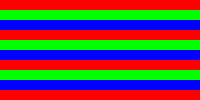

In [178]:
def rysuj_pasy_poziome_3kolory(w, h, grub):  # funkcja rysuje pasy poziome na przemian czerwony, zielony, niebieski
    t = (h, w, 3)
    tab = np.ones(t, dtype=np.uint8)
    ile = int(h / grub)
    for k in range(ile):
        for g in range(grub):
            i = k * grub + g
            for j in range(w):
                if k % 3 == 0:
                    tab[i, j] = [255, 0, 0]
                elif k % 3 == 1:
                    tab[i, j] = [0, 255, 0]
                else:
                    tab[i, j] = [0, 0, 255]
    return Image.fromarray(tab)


obraz1 = rysuj_pasy_poziome_3kolory(200, 100, 10)
obraz1


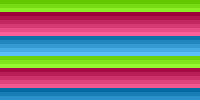

In [179]:
def rysuj_pasy_poziome_kolor(w, h, grub, kolor,
                             zmiana_koloru):  # funkcja rysuje pasy poziome, przy czym kazda składowa koloru zwieksza się o "zmiana_koloru"
    t = (h, w, 3)
    tab = np.ones(t, dtype=np.uint8)
    tab[:] = kolor
    ile = int(h / grub)
    for k in range(ile):
        r = (kolor[0] + k * zmiana_koloru) % 256
        g = (kolor[1] + k * zmiana_koloru) % 256
        b = (kolor[2] + k * zmiana_koloru) % 256
        for m in range(grub):
            i = k * grub + m
            for j in range(w):
                tab[i, j] = [r, g, b]
    return Image.fromarray(tab)


obraz2 = rysuj_pasy_poziome_kolor(200, 100, 4, [100, 200, 0], 19)
obraz2


Dlaczego jest efekt "przeskakiwania" koloru?

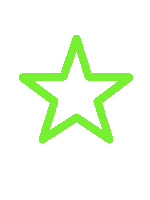

In [180]:
def koloruj_obraz(obraz, kolor):
    t_obraz = np.asarray(obraz)
    h, w = t_obraz.shape
    t = (h, w, 3)
    tab = np.ones(t, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            if t_obraz[i, j] == False:
                tab[i, j] = kolor
            else:
                tab[i, j] = [255, 255, 255]
    return Image.fromarray(tab)


gwiazdka = Image.open("gwiazdka.bmp")
obraz3 = koloruj_obraz(gwiazdka, [120, 240, 50])
obraz3

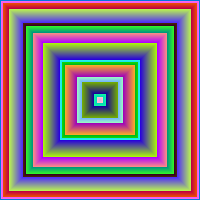

In [181]:
def rysuj_ramki_kolorowe(w, kolor, zmiana_koloru_r, zmiana_koloru_g, zmiana_koloru_b):
    t = (w, w, 3)
    tab = np.zeros(t, dtype=np.uint8)
    kolor_r = kolor[0]
    kolor_g = kolor[1]
    kolor_b = kolor[2]
    z = w
    for k in range(int(w / 2)):
        for i in range(k, z - k):
            for j in range(k, z - k):
                tab[i, j] = [kolor_r, kolor_g, kolor_b]
        kolor_r = (kolor_r - zmiana_koloru_r) % 256
        kolor_g = (kolor_g - zmiana_koloru_g) % 256
        kolor_b = (kolor_b - zmiana_koloru_b) % 256
    return Image.fromarray(tab)


obraz3 = rysuj_ramki_kolorowe(200, [0, 120, 220], 8, 15, -13)
obraz3

1. Napisz funkcje rysuj_ramki_szare(w,h,grub, ?) oraz rysuj_pasy_pionowe_szare(w,h,grub. ?)
analogiczne do rysuj_ramki(w,h,grub) oraz rysuj_pasy_pionowe(w,h,grub), w wyniku których
otrzymasz obraz w trybie L taki, że zamiast czarnego i białego koloru pojawiają się odcienie
szarości (według własnego uznania, ale według ustalonej reguły, którą trzeba będzie opisać).


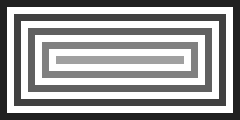

In [182]:
def rysuj_ramki_szare(w, h, grub, zmiana_koloru):
    t = (h, w)
    tab = np.ones(t, dtype=np.uint8) * 255
    ile = int(min(w, h) / (2 * grub)) + 1
    szary = 0
    for i in range(ile):
        if i % 2 == 1:
            continue
        lewo = i * grub
        prawo = w - i * grub
        gora = i * grub
        dol = h - i * grub
        szary += zmiana_koloru
        tab[gora:gora + grub, lewo:prawo] = szary % 256  # gora
        tab[dol - grub:dol, lewo:prawo] = szary % 256  # dol
        tab[gora:dol, lewo:lewo + grub] = szary % 256  # lewo
        tab[gora:dol, prawo - grub:prawo] = szary % 256  # prawo
    return Image.fromarray(tab)


rysuj_ramki_szare(240, 120, 7, 32)

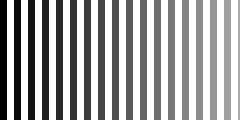

In [183]:
def rysuj_pasy_pionowe_szare(w, h, grub, zmiana_koloru):
    t = (h, w)
    tab = np.ones(t, dtype=np.uint8) * 255
    ile = int(w / grub) + 1
    szary = 0
    for i in range(ile):
        lewo = i * grub
        if i % 2 == 1:
            continue
        tab[0:h, lewo:lewo + grub] = szary % 256
        szary += zmiana_koloru
    return Image.fromarray(tab)


rysuj_pasy_pionowe_szare(240, 120, 7, 10)

2. Napisz funkcję negatyw(obraz), która rozpoznaje tryb wczytanego obrazu i jeśli jest jeden z
trybów (‘1’, ‘L’, ‘RGB’) to tworzy jego negatyw. Zastosuj funkcję do następujących obrazów
    1. gwiazdka.bmp
    2. rysuj_ramki_kolorowe(200, [20, 120,220], a, b, c)
    3. rysuj_po_skosie_szare(100, 300, a, b)
gdzie a = liczba liter w imieniu, b = liczba liter w nazwisku, c = -a

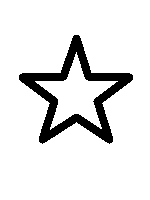

In [184]:
def negatyw(obraz):
    tablica_obrazu = np.asarray(obraz)
    tablica_negatyw = np.copy(tablica_obrazu)
    match obraz.mode:
        case '1':
            tablica_negatyw = ~tablica_obrazu
        case 'L':
            tablica_negatyw = 255 - tablica_obrazu
        case 'RGB':
            tablica_negatyw = 255 - tablica_obrazu
        case _:
            return None
    return Image.fromarray(tablica_negatyw)


gwiazdka = Image.open('gwiazdka.bmp')
gwiazdka

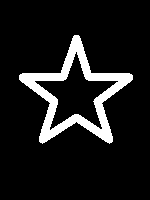

In [185]:
negatyw(gwiazdka)

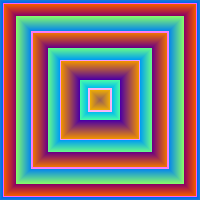

In [186]:
ramki_kolorowe_2b = rysuj_ramki_kolorowe(200, [20, 120, 220], len('Krzysztof'), len('Krupicki'),
                                         len('Krzysztof') * (-1))
ramki_kolorowe_2b

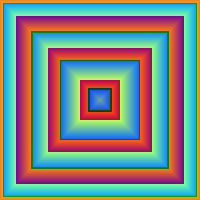

In [187]:
negatyw(ramki_kolorowe_2b)

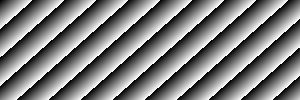

In [188]:
po_skosie_szare_2c = rysuj_po_skosie_szare(100, 300, len('Krzysztof'), len('Krupicki'))
po_skosie_szare_2c

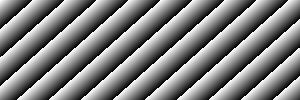

In [189]:
negatyw(po_skosie_szare_2c)

3. Napisz funkcję koloruj_w_paski(obraz, grub, ?) , która dla danego obrazu w trybie ‘1’ (np. czarne
kształty na białym tle) tworzy obraz w trybie ‘RGB’, w którym tło jest białe a kształty są
pokolorowane w kolorowe poziome paski grubości grub. Sposób kolorowania (zmianę koloru)
proszę wcześniej opisać i ewentualnie uwzględnić w argumentach funkcji.

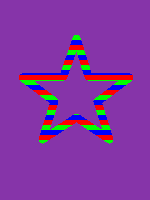

In [190]:
def koloruj_w_paski_tlo(obraz, grub, kolory=None, kolor_tla=None):
    if kolory is None:
        kolory = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
    if kolor_tla is None:
        kolor_tla = (134, 52, 169)
    tab = np.asarray(obraz).astype(np.uint8)
    h, w = tab.shape
    tab_nowego_obrazu = np.ones((h, w, 3), dtype=np.uint8) * np.array(kolor_tla, dtype=np.uint8)

    ile = int(h / grub) + 1
    for i in range(ile):
        kolor = kolory[i % len(kolory)]
        for g in range(grub):
            wiersze = i * grub + g
            if wiersze >= h:
                break
            maska = (tab[wiersze, :] == 0)
            for c in range(3):
                tab_nowego_obrazu[wiersze, maska, c] = kolor[c]

    return Image.fromarray(tab_nowego_obrazu)


koloruj_w_paski_tlo(gwiazdka, 5)

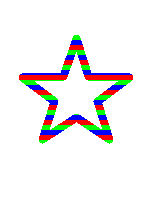

In [191]:
def koloruj_w_paski(obraz, grub, kolory=None):
    if kolory is None:
        kolory = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
    tab = np.asarray(obraz).astype(np.uint8)
    h, w = tab.shape
    tab_nowego_obrazu = np.ones((h, w, 3), dtype=np.uint8) * 255

    ile = int(h / grub) + 1
    for i in range(ile):
        kolor = kolory[i % len(kolory)]
        for g in range(grub):
            wiersze = i * grub + g
            if wiersze >= h:
                break
            maska = (tab[wiersze, :] == 0)
            for c in range(3):
                tab_nowego_obrazu[wiersze, maska, c] = kolor[c]

    return Image.fromarray(tab_nowego_obrazu)


koloruj_w_paski(gwiazdka, 5)

a) Wykonaj funkcję koloruj_w_paski(obraz, grub, ?) , gdzie obraz to czarno-biały obraz z
inicjałami własnymi z lab1.

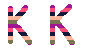

In [192]:
inicjaly = Image.open('inicjaly.bmp')
koloruj_w_paski(inicjaly, 4, kolory=[(123, 117, 84), (161, 22, 146), (255, 79, 121), (23, 24, 59), (255, 180, 154)])

b) Zapisz obraz z 3a) w formacie jpg oraz png. Czy otrzymane obrazy są takie same?
Dlaczego tak się dzieje?

Odpowiedź: \
Obrazy nie są takie same, obraz JPG jest poddawany kompresji stratnej, przez co wygląda znacznie gorzej niż bezstratny PNG. Pojawiają się szumy, artefakty, granice nie są już takie wyraźne.

4. Jak działa typ uint8 w przypadku, gdy podana wartość koloru przekracza 255 lub jest ujemna?
Jaka będzie wartość, gdy podamy a) 328 b) -24 ? Uzasadnij odpowiedź.

Odpowiedź:\
Przy 328 i -24 wyskakuje komuikat, że wartość jest poza zakresem. Typ uint8 oznacza liczbe bez znaku (dodatnią), całkowitą 8 bitową, więc jej zakres to 0-255.